# Water Quality

**Potability**: Indicates if water is safe for human consumption where **1 means Potable and 0 means Not potable.**


## Exploratory Data Analysis : EDA (Keşifsel Veri Analizi) 

In [33]:
import numpy as np  # linear algebra
import pandas as pd # data processing
import seaborn as sns # visulation
import matplotlib.pyplot as plt # visulation
import plotly.express as px # visulation

import missingno as msno # missing value analysis
from sklearn.preprocessing import scale, StandardScaler

# sınıfılandırma binary  içilebilir veya değil
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import neighbors
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import xgboost
from xgboost  import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold, train_test_split

from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report

from warnings import filterwarnings # uyarı mesajlarını kaldırmak için
filterwarnings('ignore')

In [2]:
df =  pd.read_csv("water_potability.csv")

In [3]:
df.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


#### Dependent Variable Analysis (Bağımlı Değişken Analizi)
**0-1 dağılımı ; 0 : içlemez su , 1: içilebilir**

In [6]:
d = df["Potability"].value_counts().to_frame(name="Count")
d

Count
Potability       
0            1998
1            1278

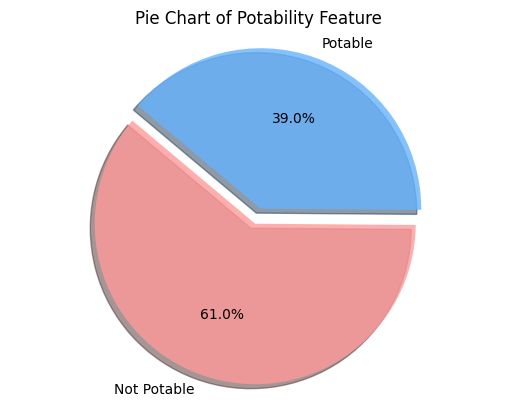

In [7]:
# Potability distribution
counts = df["Potability"].value_counts()
labels = ["Not Potable", "Potable"]
sizes = counts.values
colors = ['#ff9999','#66b3ff']

plt.pie(sizes, explode=(0.1, 0), labels=labels, colors=colors, autopct='%1.1f%%', 
        shadow=True, startangle=140, wedgeprops={'alpha': 0.8})


plt.axis('equal')  
plt.title("Pie Chart of Potability Feature")
plt.show()


### Correlation Analysis (Kolerasyon Analizi)

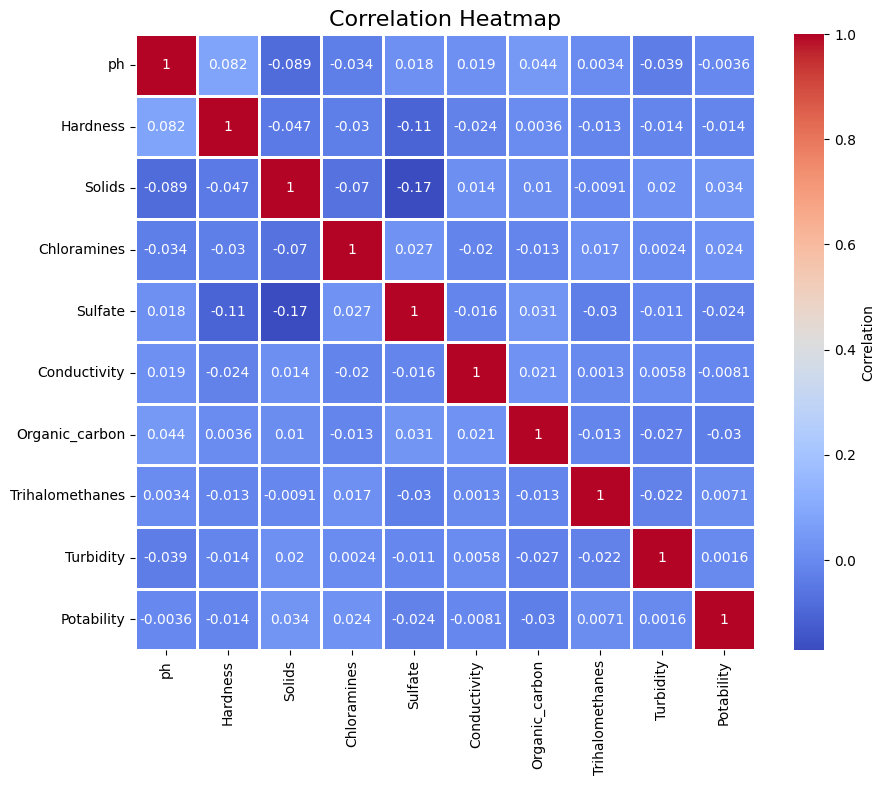

In [10]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.8, cbar_kws={'label': 'Correlation'}, 
            xticklabels=corr.columns, yticklabels=corr.columns)

plt.title("Correlation Heatmap", fontsize=16)
plt.show()

- If a feature has **high relevance** with respect to **Potability**, it may be important for the model.
- However, if some features are **highly correlated** with each other, removing one of them can help **reduce unnecessary complexity** in the model.


### Distribution of features  - Featureların dağılımı

In [11]:
non_potable = df.query("Potability == 0")
potable = df.query("Potability == 1")

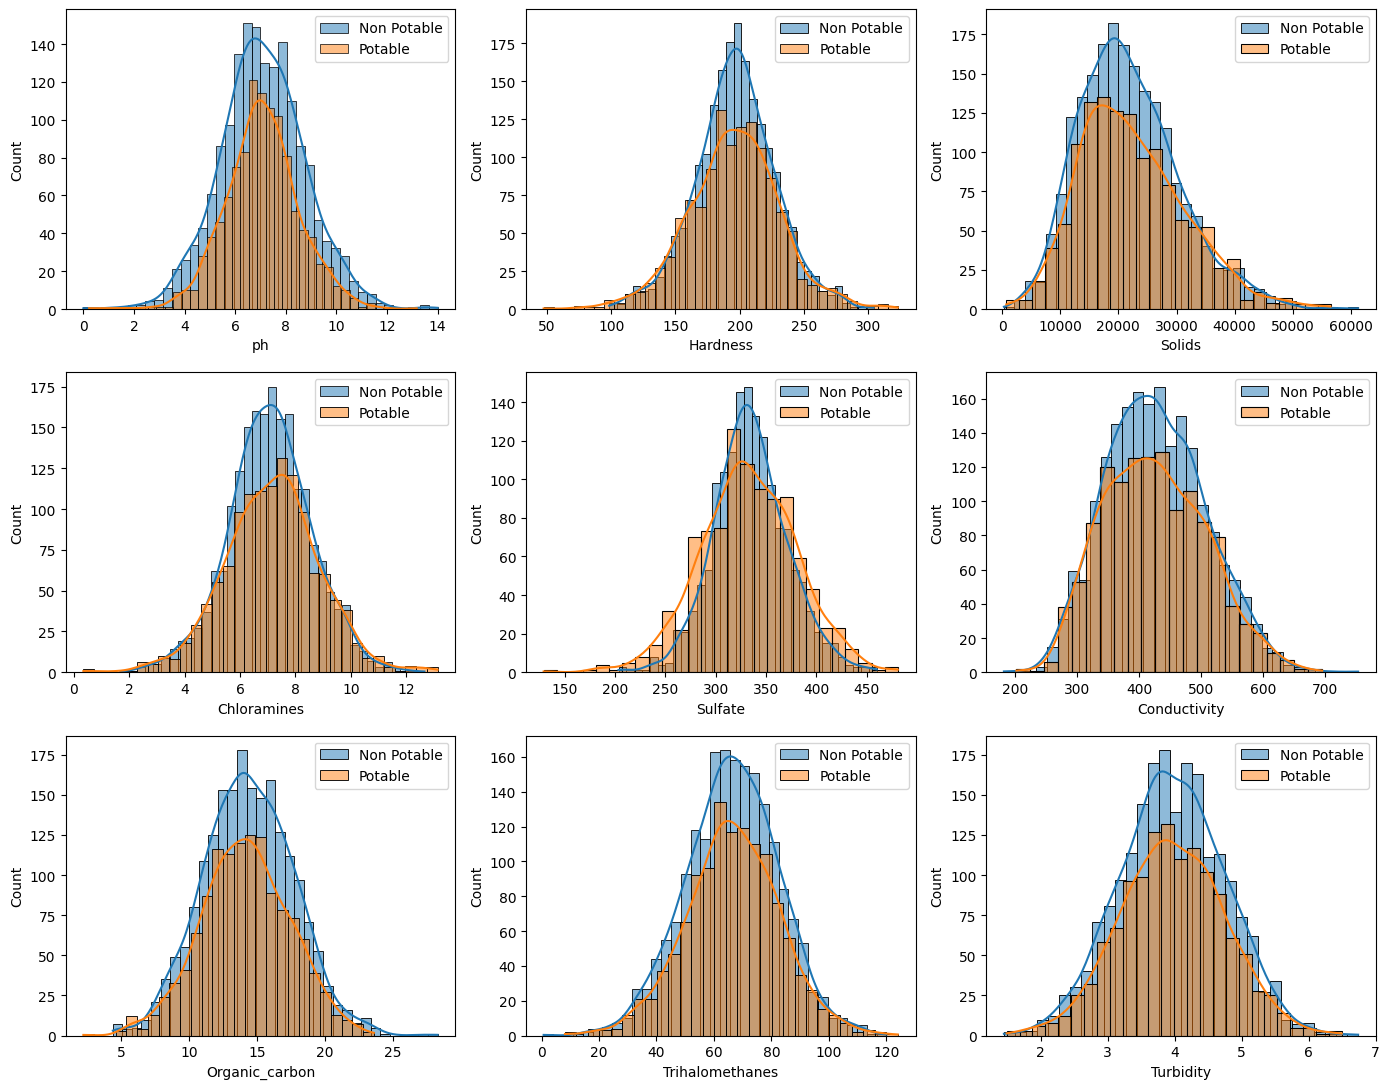

In [12]:
plt.figure(figsize=(14, 11))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3, 3, ax+1)
    sns.histplot(non_potable[col], label="Non Potable", kde=True)
    sns.histplot(potable[col], label="Potable", kde=True)
    plt.legend()
plt.tight_layout()


### Missing Value

<Figure size 500x400 with 0 Axes>

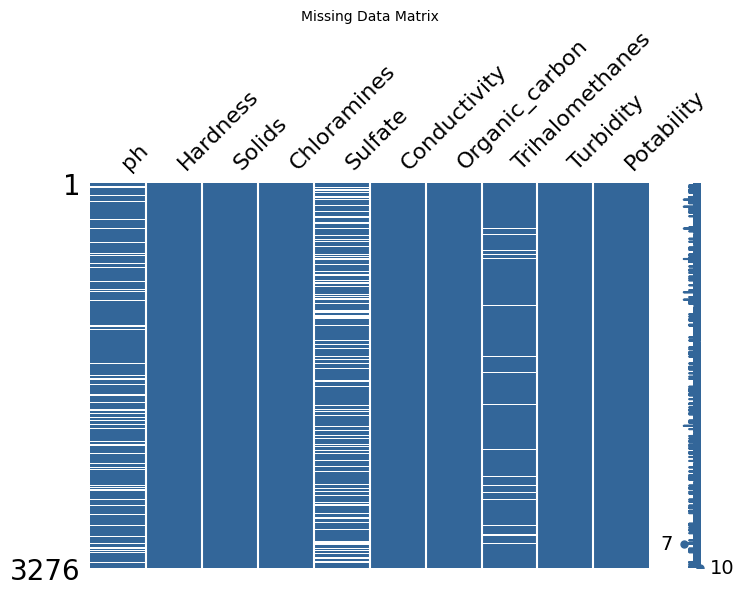

In [13]:
plt.figure(figsize=(5, 4)) 
msno.matrix(df, figsize=(8, 5), color=(0.2, 0.4, 0.6))

plt.title("Missing Data Matrix", fontsize=10)
plt.show()

# Veri Ön İşleme

## Preprocessing: Train-Test Split and Normalization

In [14]:
print(df.isnull().sum()) # true -> null

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [15]:
df.describe().T

count          mean          std         min           25%  \
ph               2785.0      7.080795     1.594320    0.000000      6.093092   
Hardness         3276.0    196.369496    32.879761   47.432000    176.850538   
Solids           3276.0  22014.092526  8768.570828  320.942611  15666.690297   
Chloramines      3276.0      7.122277     1.583085    0.352000      6.127421   
Sulfate          2495.0    333.775777    41.416840  129.000000    307.699498   
Conductivity     3276.0    426.205111    80.824064  181.483754    365.734414   
Organic_carbon   3276.0     14.284970     3.308162    2.200000     12.065801   
Trihalomethanes  3114.0     66.396293    16.175008    0.738000     55.844536   
Turbidity        3276.0      3.966786     0.780382    1.450000      3.439711   
Potability       3276.0      0.390110     0.487849    0.000000      0.000000   

                          50%           75%           max  
ph                   7.036752      8.062066     14.000000  
Hardness           196.967627    216.667456    323.124000  
Solids           20927.833607  27332.762127  61227.196008  
Chloramines          7.130299      8.114887     13.127000  
Sulfate            333.073546    359.950170    481.030642  
Conductivity       421.884968    481.792304    753.342620  
Organic_carbon      14.218338     16.557652     28.300000  
Trihalomethanes     66.622485     77.337473    124.000000  
Turbidity            3.955028      4.500320      6.739000  
Potability           0.000000      1.000000      1.000000

In [16]:
# "Potability" grubuna göre her bir grup için "ph" değerlerinin ortalamalarını eksik "ph" değerlerini, o gruptaki ortalama değerle doldurur.
df["ph"] = df["ph"].fillna(df.groupby("Potability")["ph"].transform("mean"))

In [17]:
print(df.isnull().sum())

ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [18]:
print(df[["ph", "Potability"]].tail(5))

            ph  Potability
3271  4.668102           1
3272  7.808856           1
3273  9.419510           1
3274  5.126763           1
3275  7.874671           1


Bağımlı değişkene (Potability) göre, bağımsız değişkenlerin NaN değerlerine, o bağımlı değişkene ait grup ortalamalarını atama

In [19]:
# or one line;
df.iloc[:, :-1] = df.iloc[:, :-1].fillna(df.groupby("Potability").transform("mean"))

In [20]:
print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


### Train-Test Split

In [21]:
X = df.drop("Potability",axis=1).values # independent 
y = df["Potability"].values # label :  potable - non potable

In [22]:
X

array([[7.08537844e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [23]:
y

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [25]:
X_train.shape

(2293, 9)

In [26]:
X_test.shape

(983, 9)

In [27]:
y_train.shape

(2293,)

In [28]:
y_test.shape

(983,)

In [29]:
X_train

array([[7.08537844e+00, 1.88445469e+02, 2.87916144e+04, ...,
        1.05756901e+01, 6.32353650e+01, 3.22837922e+00],
       [7.20343885e+00, 1.68445358e+02, 2.28264847e+04, ...,
        1.64106541e+01, 6.45059226e+01, 6.38916101e+00],
       [7.07378330e+00, 2.42827588e+02, 2.92980743e+04, ...,
        5.42664993e+00, 6.65396837e+01, 3.52258617e+00],
       ...,
       [6.63036382e+00, 1.86761088e+02, 3.09390232e+04, ...,
        1.38157569e+01, 8.67531175e+01, 3.49058757e+00],
       [8.78316762e+00, 2.18032840e+02, 1.61835866e+04, ...,
        1.63545202e+01, 4.71009821e+01, 4.27413688e+00],
       [6.69815387e+00, 1.98286268e+02, 3.46758628e+04, ...,
        1.21766783e+01, 6.65396837e+01, 3.75817965e+00]])

In [30]:
X_test

array([[7.08537844e+00, 1.83521107e+02, 2.04612527e+04, ...,
        2.01790289e+01, 6.70199032e+01, 4.88663379e+00],
       [6.64315871e+00, 1.88913541e+02, 3.28738200e+04, ...,
        1.47068103e+01, 6.78448489e+01, 4.56219767e+00],
       [7.84605793e+00, 2.24058877e+02, 2.32641100e+04, ...,
        1.34067375e+01, 4.30751865e+01, 2.48796865e+00],
       ...,
       [7.28873666e+00, 2.33977810e+02, 3.16170754e+04, ...,
        1.22253418e+01, 3.18020242e+01, 3.53138466e+00],
       [7.24348215e+00, 1.96982379e+02, 2.97720192e+04, ...,
        1.41549548e+01, 5.06550008e+01, 4.76357851e+00],
       [6.65364952e+00, 1.72584512e+02, 3.48164445e+04, ...,
        1.58724745e+01, 6.79768694e+01, 4.87140619e+00]])

## Modelling

In [31]:
models = [("DIC",DecisionTreeClassifier(max_depth=3)),
          ("RFC",RandomForestClassifier()),
          ("LOJ",LogisticRegression()),
          ("KNN",KNeighborsClassifier()),
          ("SVC",SVC(kernel="linear")),
          ("MLP",MLPClassifier()),
          ("CART",DecisionTreeClassifier()),
          ("GBM",GradientBoostingClassifier()),
          ("XGB",XGBClassifier()),
          ("LGBM",LGBMClassifier()),
          ("CATB",CatBoostClassifier())
          ]

In [34]:
finalResult = pd.DataFrame(columns=["Model","Accuracy","Precision"]) # score
cmList = [] # Confusion matrix

for name,model in models:
    if(name == "MLP" or name=="KNN" ):
        # X_train -  X_test scaled
        scaler = StandardScaler()
        scaler.fit(X_train)
        X_train_scaled = scaler.transform(X_train)
        scaler.fit(X_test)
        X_test_scaled = scaler.transform(X_test)

        model.fit(X_train_scaled,y_train) # training
        y_pred = model.predict(X_test_scaled) # prediction
        
        acc = accuracy_score(y_test,y_pred)
        score = precision_score(y_test,y_pred)
        finalResult =pd.concat([finalResult,pd.DataFrame([[name,acc*100,score]],columns=["Model","Accuracy","Precision"])],
                               ignore_index=True)

        cm = confusion_matrix(y_test,y_pred)
        cmList.append((name,cm))
    else:

        model.fit(X_train,y_train) # training
        y_pred = model.predict(X_test) # prediction
        
        acc = accuracy_score(y_test,y_pred)
        score = precision_score(y_test,y_pred)
        finalResult =pd.concat([finalResult,pd.DataFrame([[name,acc*100,score]],columns=["Model","Accuracy","Precision"])],
                               ignore_index=True)

        cm = confusion_matrix(y_test,y_pred)
        cmList.append((name,cm))

[LightGBM] [Info] Number of positive: 912, number of negative: 1381
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000703 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2295
[LightGBM] [Info] Number of data points in the train set: 2293, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397732 -> initscore=-0.414923
[LightGBM] [Info] Start training from score -0.414923
Learning rate set to 0.014683
0:	learn: 0.6858908	total: 158ms	remaining: 2m 37s
1:	learn: 0.6816053	total: 162ms	remaining: 1m 20s
2:	learn: 0.6752570	total: 166ms	remaining: 55.2s
3:	learn: 0.6706333	total: 170ms	remaining: 42.4s
4:	learn: 0.6634785	total: 174ms	remaining: 34.7s
5:	learn: 0.6571892	total: 178ms	remaining: 29.6s
6:	learn: 0.6525595	total: 183ms	remaining: 25.9s
7:	learn: 0.6472463	total: 187ms	remaining: 23.2s
8:	learn: 0.641

In [35]:
finalResult

Model   Accuracy  Precision
0    DIC  71.414039   0.673469
1    RFC  79.145473   0.790614
2    LOJ  62.767040   0.000000
3    KNN  62.563581   0.496350
4    SVC  62.461851   0.400000
5    MLP  67.548321   0.592157
6   CART  72.939980   0.634409
7    GBM  77.822991   0.800813
8    XGB  79.654120   0.766026
9   LGBM  79.959308   0.764890
10  CATB  80.467955   0.815217

In [36]:
cmList

[('DIC',
  array([[537,  80],
         [201, 165]], dtype=int64)),
 ('RFC',
  array([[559,  58],
         [147, 219]], dtype=int64)),
 ('LOJ',
  array([[617,   0],
         [366,   0]], dtype=int64)),
 ('KNN',
  array([[479, 138],
         [230, 136]], dtype=int64)),
 ('SVC',
  array([[608,   9],
         [360,   6]], dtype=int64)),
 ('MLP',
  array([[513, 104],
         [215, 151]], dtype=int64)),
 ('CART',
  array([[481, 136],
         [130, 236]], dtype=int64)),
 ('GBM',
  array([[568,  49],
         [169, 197]], dtype=int64)),
 ('XGB',
  array([[544,  73],
         [127, 239]], dtype=int64)),
 ('LGBM',
  array([[542,  75],
         [122, 244]], dtype=int64)),
 ('CATB',
  array([[566,  51],
         [141, 225]], dtype=int64))]

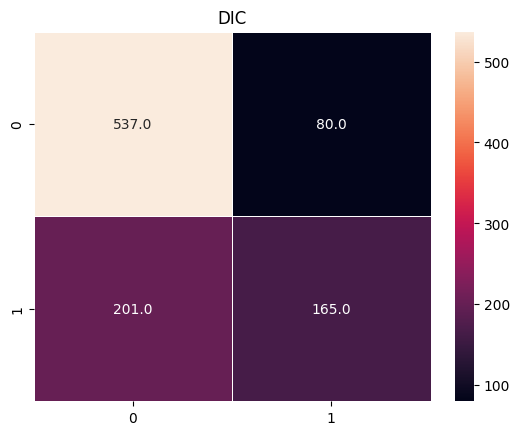

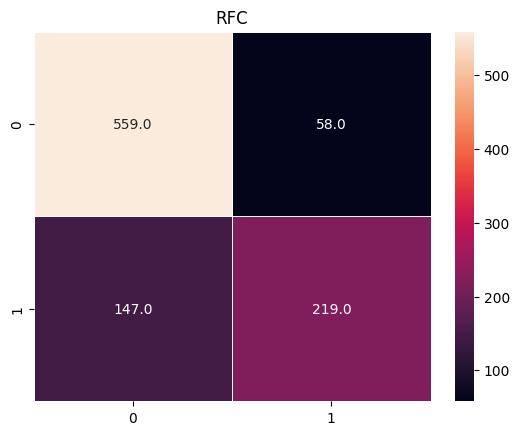

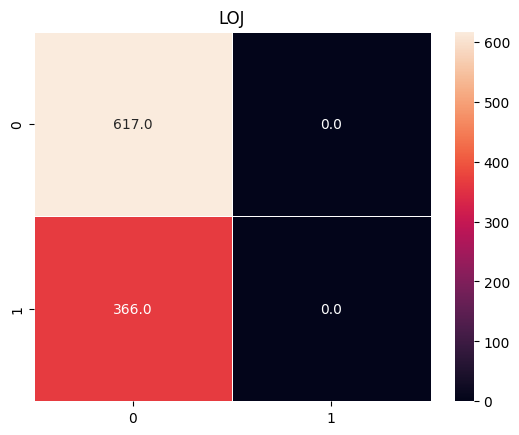

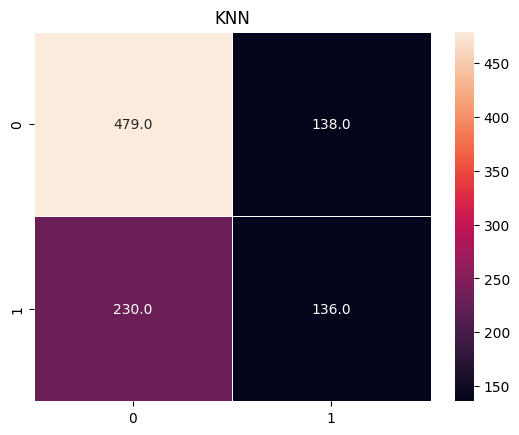

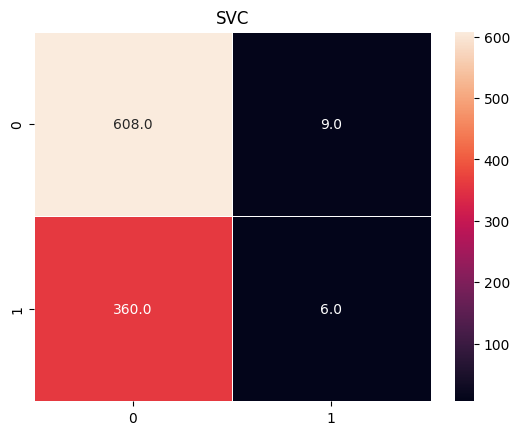

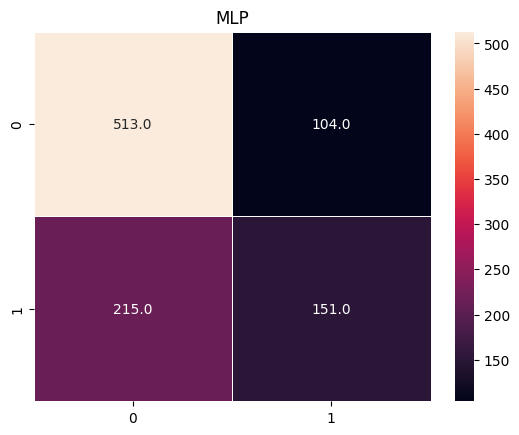

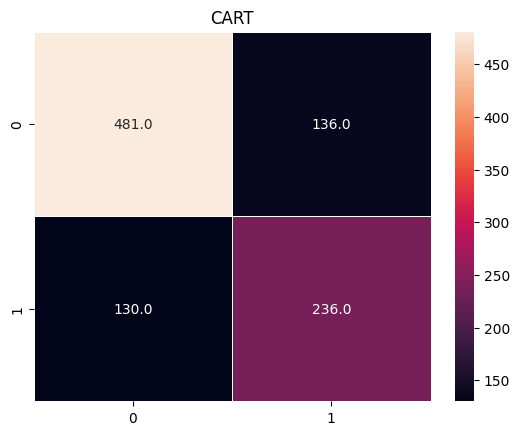

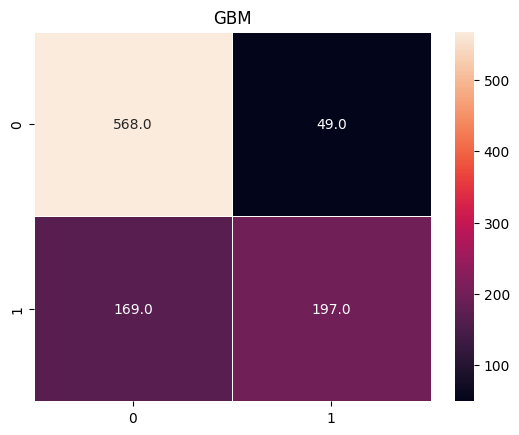

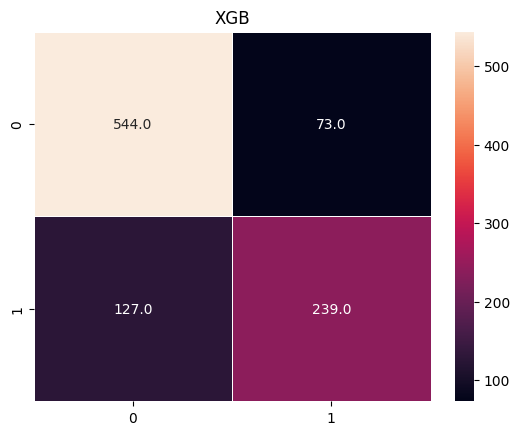

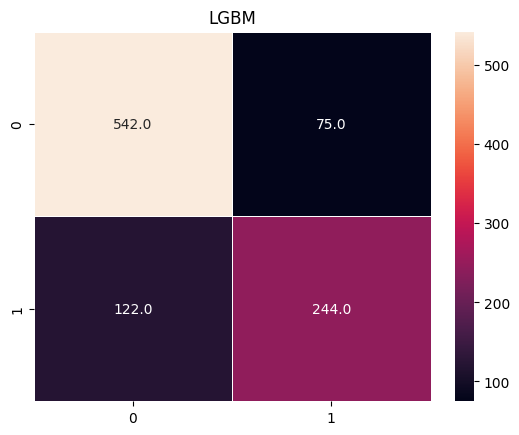

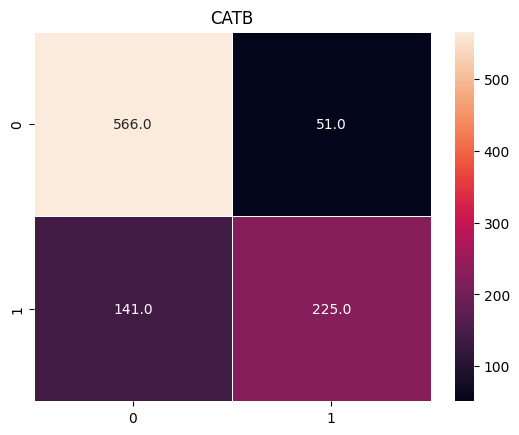

In [37]:
for name,i in cmList:
    plt.figure()
    sns.heatmap(i,annot=True,linewidths=0.4,fmt=".1f")
    plt.title(name)
    plt.show()

## Hyperparameter Tuning 

In [41]:
model_params = {
    "CatBoost":{
        "model":CatBoostClassifier(),
        "params":{
            "iterations":[200,500,1000],
            "learning_rate":[0.01,0.03,0.1],
            "depth":[4,5,8]
        }
    },
    "Random Forest":{
        "model":RandomForestClassifier(),
        "params":{
            "n_estimators":[50,100,200,500],
            "max_features":["outo","sqrt","log2"],
            "max_depth":list(range(1,21,3)),
            "min_samples_split":[5,10,20] 
        }
    },
    "XGB":{
        "model":XGBClassifier(),
        "params":{
            "n_estimators":[100,500,1000,2000],
            "subsample":[0.6,0.8,1],
            "max_depth":[3,5,6,7],
            "learning_rate":[0.1,0.001,0.01]
        }
    },
    "LGBM":{
        "model":LGBMClassifier(),
        "params":{
            "learning_rate":[0.001,0.01,0.1],
            "n_estimators":[200,500,100],
            "max_depth":[1,2,3,5,8]},
        },
    }

In [42]:
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=2)
scores = []

for model_name,params in model_params.items():
    rs = RandomizedSearchCV(params["model"],params["params"],cv=cv,n_iter=10) 
    rs.fit(X,y)
    scores.append([model_name,dict(rs.best_params_),rs.best_score_])

scores

0:	learn: 0.6881779	total: 8.17ms	remaining: 4.07s
1:	learn: 0.6847884	total: 11.8ms	remaining: 2.93s
2:	learn: 0.6818836	total: 15.9ms	remaining: 2.63s
3:	learn: 0.6773251	total: 20.8ms	remaining: 2.58s
4:	learn: 0.6728845	total: 23.7ms	remaining: 2.35s
5:	learn: 0.6703825	total: 26.6ms	remaining: 2.19s
6:	learn: 0.6667157	total: 29.3ms	remaining: 2.06s
7:	learn: 0.6639293	total: 32.2ms	remaining: 1.98s
8:	learn: 0.6602246	total: 35.5ms	remaining: 1.94s
9:	learn: 0.6574776	total: 38.4ms	remaining: 1.88s
10:	learn: 0.6533696	total: 41.2ms	remaining: 1.83s
11:	learn: 0.6505530	total: 44.1ms	remaining: 1.79s
12:	learn: 0.6476480	total: 47ms	remaining: 1.76s
13:	learn: 0.6433591	total: 49.9ms	remaining: 1.73s
14:	learn: 0.6411248	total: 52.7ms	remaining: 1.7s
15:	learn: 0.6390978	total: 55.3ms	remaining: 1.67s
16:	learn: 0.6368330	total: 58.2ms	remaining: 1.65s
17:	learn: 0.6343636	total: 61.8ms	remaining: 1.65s
18:	learn: 0.6325179	total: 66.9ms	remaining: 1.69s
19:	learn: 0.6302692	tota

[['CatBoost',
  {'learning_rate': 0.01, 'iterations': 1000, 'depth': 4},
  0.8017382703407187],
 ['Random Forest',
  {'n_estimators': 200,
   'min_samples_split': 5,
   'max_features': 'log2',
   'max_depth': 10},
  0.7962441817166265],
 ['XGB',
  {'subsample': 0.8,
   'n_estimators': 500,
   'max_depth': 5,
   'learning_rate': 0.01},
  0.7988423943399738],
 ['LGBM',
  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
  0.789684416309812]]

In [44]:
scores

[['CatBoost',
  {'learning_rate': 0.01, 'iterations': 1000, 'depth': 4},
  0.8017382703407187],
 ['Random Forest',
  {'n_estimators': 200,
   'min_samples_split': 5,
   'max_features': 'log2',
   'max_depth': 10},
  0.7962441817166265],
 ['XGB',
  {'subsample': 0.8,
   'n_estimators': 500,
   'max_depth': 5,
   'learning_rate': 0.01},
  0.7988423943399738],
 ['LGBM',
  {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
  0.789684416309812]]

## Final Models : RandomForest , CatBoost

In [45]:
catb_tuned_model = CatBoostClassifier(learning_rate=0.01,
                                      iterations=1000,depth=4).fit(X_train,y_train)

rfc_tuned_model = RandomForestClassifier(n_estimators=200,
                                         min_samples_split=5,
                                         max_features="log2",
                                         max_depth=10).fit(X_train,y_train)

xgb_tuned_model = XGBClassifier(subsample=0.8,n_estimators=500,
                                max_depth=5,learning_rate=0.01).fit(X_train,y_train)

0:	learn: 0.6881454	total: 3.22ms	remaining: 3.22s
1:	learn: 0.6846144	total: 6.27ms	remaining: 3.13s
2:	learn: 0.6803465	total: 9.58ms	remaining: 3.18s
3:	learn: 0.6768937	total: 13ms	remaining: 3.23s
4:	learn: 0.6735069	total: 20.1ms	remaining: 4.01s
5:	learn: 0.6693226	total: 32.5ms	remaining: 5.38s
6:	learn: 0.6665315	total: 44.7ms	remaining: 6.35s
7:	learn: 0.6635438	total: 60.4ms	remaining: 7.5s
8:	learn: 0.6594936	total: 65.4ms	remaining: 7.2s
9:	learn: 0.6573381	total: 71.2ms	remaining: 7.05s
10:	learn: 0.6549160	total: 75.7ms	remaining: 6.8s
11:	learn: 0.6517998	total: 78.5ms	remaining: 6.46s
12:	learn: 0.6493687	total: 81.3ms	remaining: 6.17s
13:	learn: 0.6468543	total: 84.5ms	remaining: 5.95s
14:	learn: 0.6429765	total: 87.9ms	remaining: 5.77s
15:	learn: 0.6394457	total: 90.5ms	remaining: 5.57s
16:	learn: 0.6361168	total: 93.3ms	remaining: 5.39s
17:	learn: 0.6338543	total: 96.1ms	remaining: 5.24s
18:	learn: 0.6322118	total: 98.8ms	remaining: 5.1s
19:	learn: 0.6290118	total: 

#### CATBoost Predict

In [46]:
y_pred = catb_tuned_model.predict(X_test)
precision_score(y_test,y_pred)

0.8559670781893004

In [47]:
accuracy_score(y_test,y_pred)

0.8036622583926755

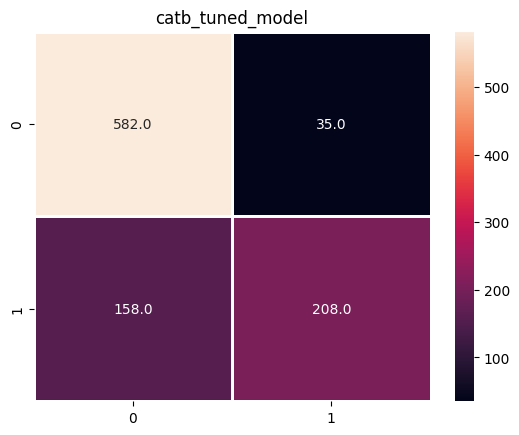

In [48]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=0.8,fmt=".1f")
plt.title("catb_tuned_model")
plt.show()

#### RandomForest Predict

In [49]:
y_pred = rfc_tuned_model.predict(X_test)
precision_score(y_test,y_pred)

0.8518518518518519

In [50]:
accuracy_score(y_test,y_pred)

0.8016276703967447

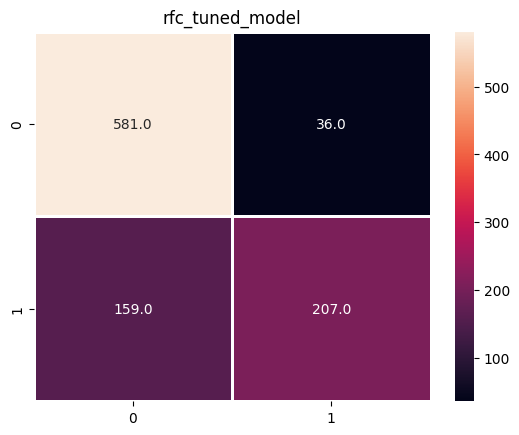

In [51]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=0.8,fmt=".1f")
plt.title("rfc_tuned_model")
plt.show()

#### XGBoost Predict

In [52]:
y_pred = xgb_tuned_model.predict(X_test)
precision_score(y_test,y_pred)

0.8068181818181818

In [53]:
accuracy_score(y_test,y_pred)

0.7924720244150559

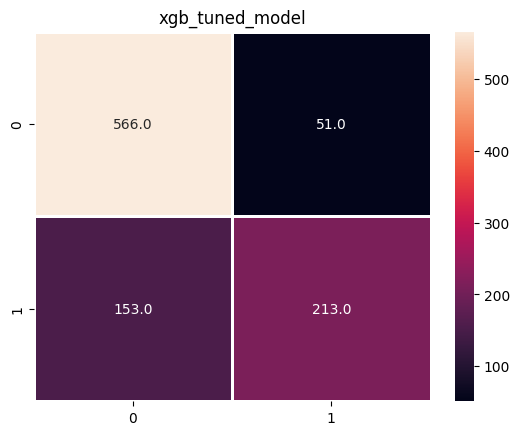

In [54]:
plt.figure()
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=0.8,fmt=".1f")
plt.title("xgb_tuned_model")
plt.show()

### CATB Model Variable Importance Levels

In [55]:
catb_tuned_model.feature_importances_

array([32.08246125,  2.60963746,  2.54532704,  2.58607183, 53.64257516,
        0.95534926,  0.96253256,  4.04718342,  0.56886202])

In [56]:
df.drop(columns=["Potability"]).columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity'],
      dtype='object')

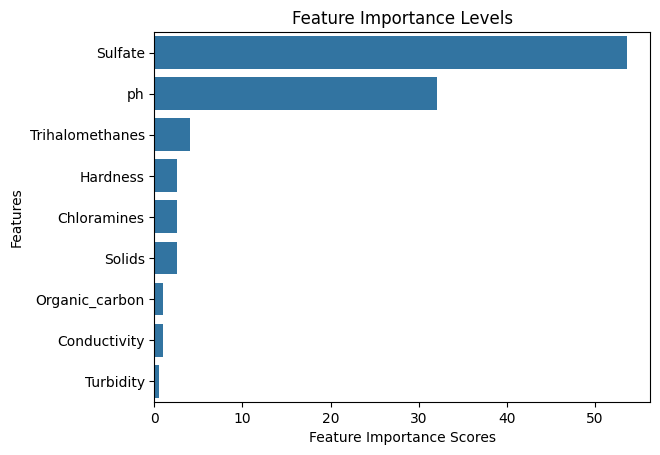

In [59]:
feature_imp  = pd.Series(catb_tuned_model.feature_importances_,
                         index= df.drop(columns=["Potability"]).columns).sort_values(ascending=False)

sns.barplot(x =  feature_imp,y=feature_imp.index)
plt.xlabel("Feature Importance Scores")
plt.ylabel("Features")
plt.title("Feature Importance Levels")
plt.show()